### Nama: Muhammad Dayutirta Mahara

### NIM: 2241720210

### Kelas: TI - 3E

# PRAKTIKUM 1

## Langkah 1 - Load Data

Melakukan import library yang dibutuhkan, lalu meload data kedalam DataFrame Pandas

In [ ]:
import pandas as pd

data = 'Titanic-Dataset.csv' # path dataset
df = pd.read_csv(data) # load dataset

FileNotFoundError: [Errno 2] No such file or directory: 'Titanic-Dataset.csv'

jika menggunakan colab, kita harus upload datanya dulu ke colab, baru kemudian bisa diakses

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv'])) # load dataset

KeyboardInterrupt: 

setelah file CSV diunggah kemudian kode diatas mengambil data dari file CSV yang telah diunggah ke Google Colab lalu membaca data ke DataFrame menggunakan pandas.


In [ ]:
df.head()

kemudian memasukkan perintah df.head() yang berfungsi menampilkan data teratas seperti tampilan diatas

## Langkah 2 - Pengecakan Data

df.info() digunakan untuk mengecek informasi mengenai data.

In [ ]:
df.info()

df.isnull().sum() digunakan untuk mengetahui jumlah data yang hilang.

In [ ]:
df.isnull().sum()

## Langkah 3 - Imputasi

kode dibawah digunakan untuk mengecek data yang hilang atau missing value dalam kolom - kolom tertentu dari df(DataFrame).

In [ ]:
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

## Langkah 4 - Validasi Hasil

melakukan pengecekan kembali dengan df.info() apakah nilai yang diisikan sudah benar.

In [ ]:
df.info()

# PRAKTIKUM 2
Seleksi Fitur, Encoding, dan Standarisasi

## Langkah 0 - Load Library

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

fungsi kode ini yaitu mengimport dua library Pandas dan Scikit-learn.

## Langkah 1 - Load Data

In [ ]:
dpath = '/content/Titanic-Dataset-fixed.csv'
df = pd.read_csv(dpath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


ketika copy kode dari atas maka terjadi error karena filenya belum diunggah dan pathnya tidak sesuai dengan file yang diunggah. Kode diatas berrtujuan untuk membaca sebuah file CSV dan menampilkan data.

## Langkah 2 - Slice Data

In [ ]:
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,male,DECK
1,1,1,38.0,female,C85
2,1,3,26.0,female,DECK
3,1,1,35.0,female,C123
4,0,3,35.0,male,DECK


maksud kode diatas memilih kolom - kolom tertentu dari data yaitu kolom 'Survived', 'Pclass', 'Age', 'Sex', 'Cabin'.

## Langkah 3 - Encoding

In [ ]:
le = LabelEncoder() # membuat objek dari LabelEncoder
df['Sex'] = le.fit_transform(df['Sex']) # proses encoding
df['Cabin'] = le.fit_transform(df['Cabin']) # proses encoding

kode diatas menggunakan LabelEncoder() dari library scikit-learn untuk mengubah data kategori menjadi numerik dengan encoding(bagian dari preprocessing data

## Langkah 4 - Verifikasi Hasil

In [ ]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,1,115
1,1,1,38.0,0,81
2,1,3,26.0,0,115
3,1,1,35.0,0,55
4,0,3,35.0,1,115


kita akan cek kembalii data yang awalnya kolom 'sex' male, female menjadi 0 dan 1.

## Langkah 5 - Standarisasi

In [ ]:
std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

kode ini berfungsi melakukan standarisasi pada kolom 'Age' dengan menggunakan StandardScaler dari library scikit-learn

## Langkah 6 - Verifikasi Hasil Standarisasi

In [ ]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


terjadi perubahan setelah kita check pada kolom 'Age' seperti tabel diatas

# PRAKTIKUM 3
Spliting Data

## Random Split

### Langkah 1 - Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


menampilkan isi file dari DataFrame.



### Langkah 2 - Split Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


Untuk membagi dataset menjadi tiga subset yaitu data pelatihan (tarin), data validasi (validation), dan data pengujian (test).

## Stratified Split

### Langkah 1 - Load Data

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


pertama kita membaca dan menampilkan data terlebih dahulu

### Langkah 2 - Split Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    51
1    38
Name: count, dtype: int64
Jumlah label data test:
Survived
0    59
1    31
Name: count, dtype: int64


Kode ini membagi dataset df2 menjadi subset pelatihan, validasi, dan pengujian dengan rasio 80:10:10, sambil menjaga distribusi label Survived tetap konsisten di setiap subset dengan menggunakan stratifikasi.

## Cross Validation 1

### Langkah 1 - Load Data

In [ ]:
import pandas as pd

df3 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


kita akan load data

### Langkah 2 - Split Data

In [ ]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

Kode ini digunakan untuk mengimplementasikan 4-fold cross-validation pada dataset df3. KFold membagi dataset menjadi 4 fold, dan kode ini menampilkan bagaimana data dibagi menjadi indeks pelatihan dan pengujian untuk setiap fold.

## Cross Validation 2

### Langkah 1 - Load Data

In [ ]:
import pandas as pd

df4 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


kita load file terlebih dahulu

### Langkah 2 - Split Data

In [ ]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

Kode ini membagi dataset df4 menjadi data pelatihan dan pengujian dengan rasio 80:20. Kemudian, kode ini menggunakan 4-fold cross-validation pada data pelatihan (df4_train) untuk mengevaluasi model dengan beberapa fold. Data pengujian (df4_test) tetap tersedia untuk evaluasi akhir setelah model dilatih dan divalidasi.

# PRAKTIKUM 4
Ekstraksi Fitur Data Tidak Terstruktur

## Langkah 0 - Install Library

In [ ]:
!pip install Pillow

## Langkah 1 - Load Image

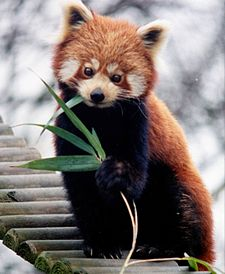

In [ ]:
from PIL import Image

img = Image.open('/content/foto/redpandajpg.jpg')
img.show() # tampilkan gambar
display(img) # metode alternatif tampilkan gambar

pertama kita akan load image terlebih dahulu misalnya ngambil gambar kucing

## Langkah 2 - Ekstrak Fitur

Kode ini digunakan untuk memproses gambar RGB dengan cara memisahkan channel merah, hijau, dan biru. Selanjutnya, kode ini menghitung dan mencetak histogram dari channel merah, yang menunjukkan distribusi frekuensi intensitas pixel dalam channel tersebut.

In [ ]:
# Ekstrak setiap channel red, green, blue
r, g, b = img.split()

# Cek panjang ukuran channel red
print(len(r.histogram()))

# Cetak fitur histogram pada channel red
print(r.histogram())

256
[2601, 3292, 1554, 1482, 774, 503, 451, 373, 322, 276, 274, 265, 210, 231, 203, 188, 171, 155, 142, 162, 154, 160, 140, 121, 127, 128, 127, 119, 119, 135, 127, 146, 132, 129, 130, 111, 120, 139, 111, 117, 133, 107, 130, 124, 114, 119, 109, 104, 111, 124, 121, 109, 112, 124, 106, 128, 137, 118, 124, 106, 109, 119, 113, 135, 118, 103, 106, 116, 117, 100, 123, 117, 106, 108, 116, 109, 118, 93, 113, 124, 103, 123, 107, 119, 88, 103, 134, 114, 105, 125, 128, 122, 139, 146, 108, 125, 124, 157, 112, 109, 117, 144, 115, 118, 118, 131, 103, 121, 134, 127, 122, 120, 129, 142, 146, 152, 137, 127, 139, 134, 164, 145, 151, 148, 137, 158, 161, 135, 179, 144, 148, 182, 159, 157, 206, 200, 201, 214, 194, 215, 185, 195, 185, 193, 201, 224, 198, 223, 190, 204, 204, 201, 212, 193, 191, 205, 186, 228, 207, 231, 229, 249, 240, 241, 259, 274, 274, 313, 298, 299, 269, 304, 267, 261, 287, 292, 301, 272, 297, 314, 307, 296, 284, 284, 289, 299, 302, 290, 286, 276, 296, 270, 322, 309, 301, 327, 267, 288, 308

# TUGAS PRAKTIKUM

## Deskripsi Tugas
Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B). Tugas Anda adalah,

1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.
2. Lakukan proses encoding pada kolom "diagnosis".
3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.
4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

### 1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('/content/file/wbc.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


setelah itu kita pisahkan mana yang dapat digunakan dan variabel yang tidak digunakan

In [ ]:
df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diagnosis       569 non-null    object 
 1   radius_mean     569 non-null    float64
 2   texture_mean    569 non-null    float64
 3   perimeter_mean  569 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.9+ KB


### 2. Lakukan proses encoding pada kolom "diagnosis".

In [ ]:
# Encoding kolom 'diagnosis'
label_encoder = LabelEncoder()
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])
# Tampilkan hasil encoding
print("Mapping label:")
for label, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded}")

Mapping label:
B: 0
M: 1


setelah itu kita akan check pada kolom baru yaitu diagnosis_encoded apakah benar terdiagnosis apa belum

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,diagnosis_encoded
0,M,17.99,10.38,122.80,1
1,M,20.57,17.77,132.90,1
2,M,19.69,21.25,130.00,1
3,M,11.42,20.38,77.58,1
4,M,20.29,14.34,135.10,1


In [ ]:
# Hapus kolom diagnosis asli
df = df.drop(columns=['diagnosis'])
df.head()

,radius_mean,texture_mean,perimeter_mean,diagnosis_encoded
0,17.99,10.38,122.80,1
1,20.57,17.77,132.90,1
2,19.69,21.25,130.00,1
3,11.42,20.38,77.58,1
4,20.29,14.34,135.10,1


## 3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.

In [ ]:
# Pisahkan fitur dan target
X = df[['radius_mean', 'texture_mean', 'perimeter_mean']]
y = df['diagnosis_encoded']

pisahkan fitur dan target

In [ ]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Gabungkan kembali dengan kolom target
df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
df_scaled.head()

,radius_mean,texture_mean,perimeter_mean,diagnosis_encoded
0,1.097064,-2.073335,1.269934,1
1,1.829821,-0.353632,1.685955,1
2,1.579888,0.456187,1.566503,1
3,-0.768909,0.253732,-0.592687,1
4,1.750297,-1.151816,1.776573,1


Menstandarkan fitur numerik untuk memastikan skala yang sama.

### 4. Proses Stratified Split Data untuk Membuat Data Latih dan Data Uji dengan Rasio 80:20

In [24]:
from sklearn.model_selection import train_test_split

# Stratified split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=0, stratify=y
)

# Output ukuran data untuk verifikasi
print(f'Jumlah data latih: {X_train.shape[0]}')
print(f'Jumlah data uji: {X_test.shape[0]}')
print(f'Jumlah label latih: {pd.Series(y_train).value_counts()}')
print(f'Jumlah label uji: {pd.Series(y_test).value_counts()}')

Jumlah data latih: 455
Jumlah data uji: 114
Jumlah label latih: diagnosis_encoded
0    285
1    170
Name: count, dtype: int64
Jumlah label uji: diagnosis_encoded
0    72
1    42
Name: count, dtype: int64


Membagi data dengan memastikan proporsi kelas target terjaga.